# **Predicting credit card approval based on customer information.**

### **Project Overview:**

#### The project focuses on using machine learning to predict credit card approval based on customer information. The credit card department aims to enhance creditworthiness evaluation using a data-driven Credit Scoring system. This involves analyzing application data, Credit Bureau Scores, and internal information to assess risk levels. The project leverages historical data to build predictive models for streamlined and informed credit card approval decisions.

### **Problem Statement:**
#### The current credit card approval process relies on traditional methods, and the bank seeks to enhance its efficiency and accuracy through machine learning. The goal is to develop predictive models that can analyze customer information and predict credit card approval, minimizing the risk associated with offering credit cards. The challenge lies in leveraging historical data, incorporating diverse sources of information, and building robust models that can adapt to changing credit evaluation criteria. The objective is to implement a data-driven approach to credit scoring for improved decision-making in the credit card approval process.

### **Goal:**
#### The goal of the project is to employ machine learning algorithms to predict credit card approval accurately, ensuring that only creditworthy individuals receive approval.




### **Tools Used:**
#### Jupyter Notebook


### **Initial Hypothesis**


# Exploring the dataset

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('Credit_card.csv')
df2 = pd.read_csv('Credit_card_label.csv')
df1.head()
df2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [2]:
# Merging df1 and df2 DataFrames
df = pd.merge(df1, df2, on='Ind_ID', how='outer')


In [3]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [4]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
df.shape

(1548, 19)

In [6]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [7]:
#converting columns into lower case
for col in df.columns:
    df.rename(columns={col: col.lower()}, inplace=True)

In [8]:
df.columns

Index(['ind_id', 'gender', 'car_owner', 'propert_owner', 'children',
       'annual_income', 'type_income', 'education', 'marital_status',
       'housing_type', 'birthday_count', 'employed_days', 'mobile_phone',
       'work_phone', 'phone', 'email_id', 'type_occupation', 'family_members',
       'label'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ind_id           1548 non-null   int64  
 1   gender           1541 non-null   object 
 2   car_owner        1548 non-null   object 
 3   propert_owner    1548 non-null   object 
 4   children         1548 non-null   int64  
 5   annual_income    1525 non-null   float64
 6   type_income      1548 non-null   object 
 7   education        1548 non-null   object 
 8   marital_status   1548 non-null   object 
 9   housing_type     1548 non-null   object 
 10  birthday_count   1526 non-null   float64
 11  employed_days    1548 non-null   int64  
 12  mobile_phone     1548 non-null   int64  
 13  work_phone       1548 non-null   int64  
 14  phone            1548 non-null   int64  
 15  email_id         1548 non-null   int64  
 16  type_occupation  1060 non-null   object 
 17  family_members

#### **Checking Unique Values**

In [10]:
for col in df.columns:
    print(f'{col}', df[col].unique())
    print()


ind_id [5008827 5009744 5009746 ... 5115992 5118219 5053790]

gender ['M' 'F' nan]

car_owner ['Y' 'N']

propert_owner ['Y' 'N']

children [ 0  1  2  4  3 14]

annual_income [ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.   328500.
  787500.   594000.   119700.    69372.    37800.   3870

In [11]:
df.isnull().sum()/len(df) * 100


ind_id              0.000000
gender              0.452196
car_owner           0.000000
propert_owner       0.000000
children            0.000000
annual_income       1.485788
type_income         0.000000
education           0.000000
marital_status      0.000000
housing_type        0.000000
birthday_count      1.421189
employed_days       0.000000
mobile_phone        0.000000
work_phone          0.000000
phone               0.000000
email_id            0.000000
type_occupation    31.524548
family_members      0.000000
label               0.000000
dtype: float64

<Axes: >

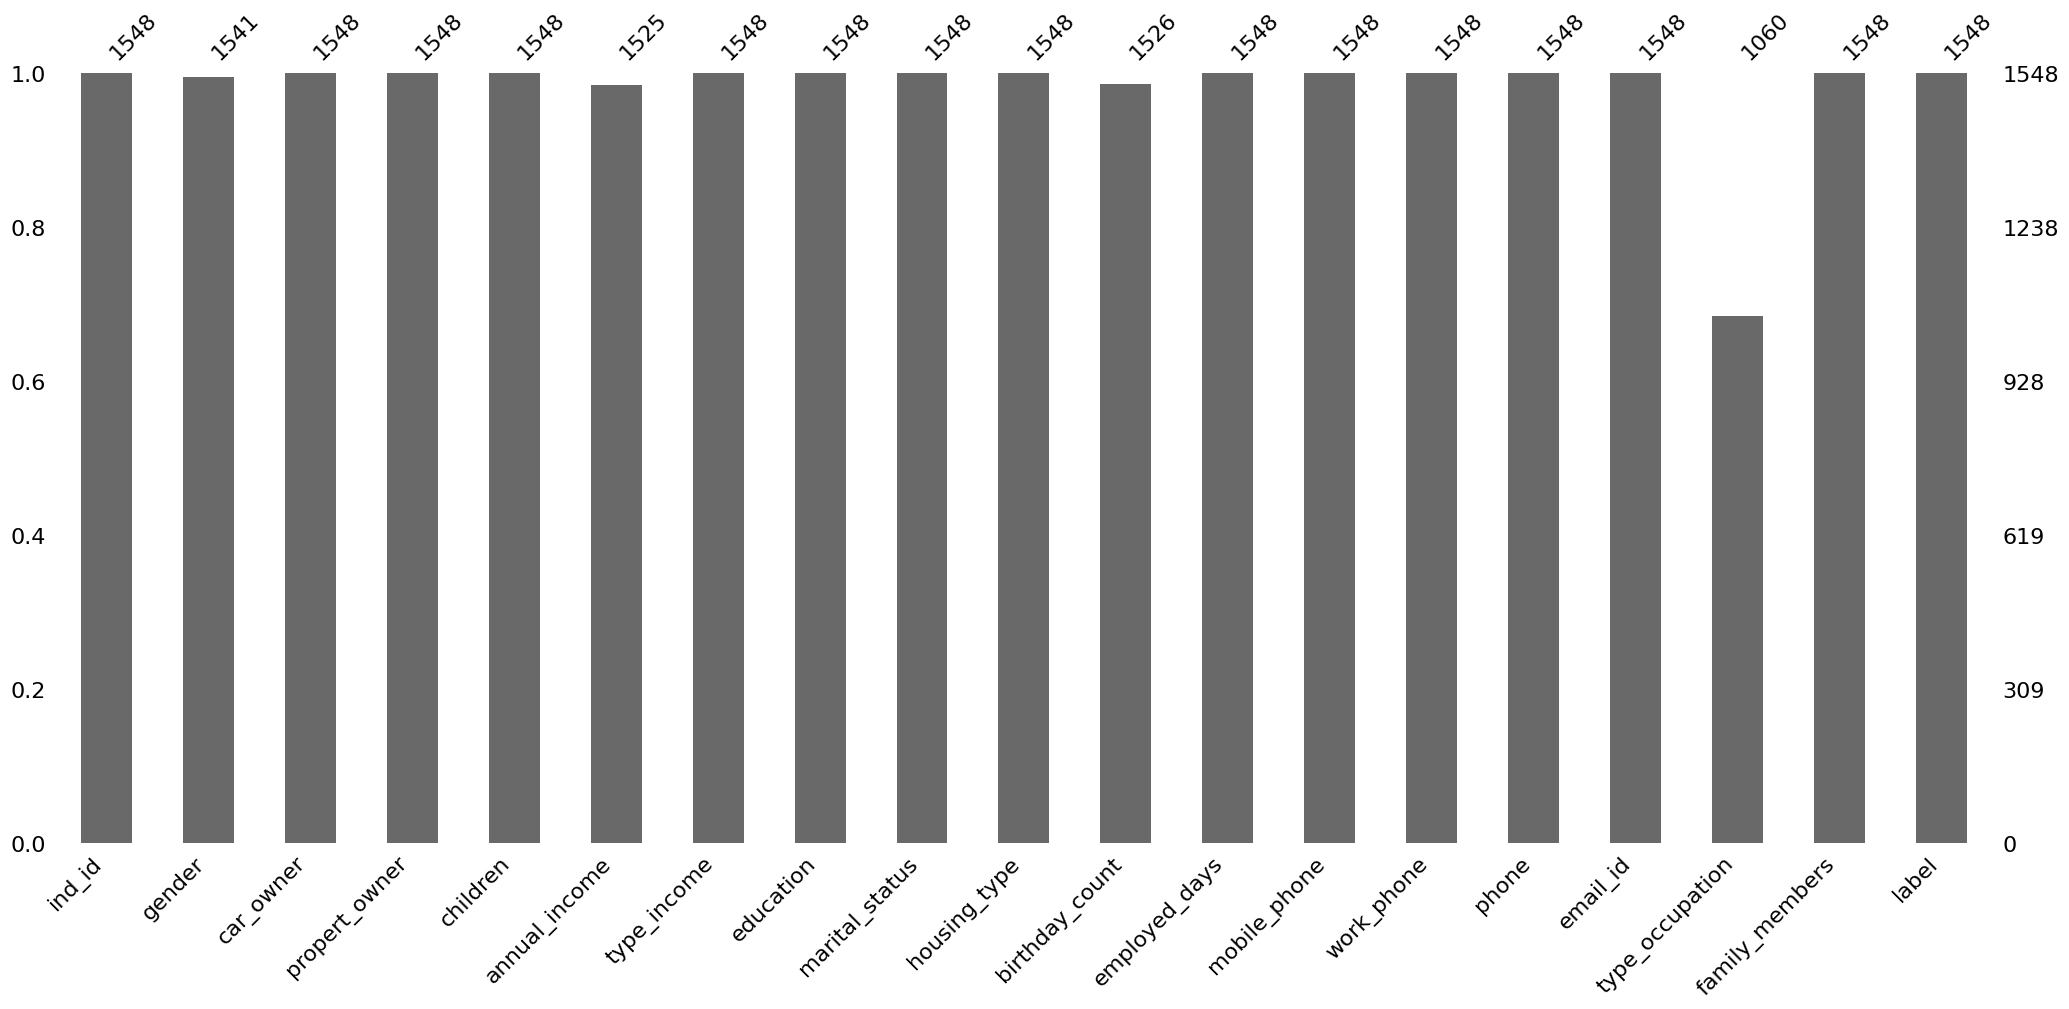

In [12]:
#Visualizing Null Values
import missingno as msno
msno.bar(df)

Null values are identified in the 'gender', annual_income,' 'birthday_count,' and 'type_occupation' columns.

In [13]:
for col in df.columns:
    print(f'{col}', df[col].value_counts())
    print()

ind_id ind_id
5008827    1
5142163    1
5024925    1
5143560    1
5068648    1
          ..
5148792    1
5142290    1
5095324    1
5118270    1
5053790    1
Name: count, Length: 1548, dtype: int64

gender gender
F    973
M    568
Name: count, dtype: int64

car_owner car_owner
N    924
Y    624
Name: count, dtype: int64

propert_owner propert_owner
Y    1010
N     538
Name: count, dtype: int64

children children
0     1091
1      305
2      134
3       16
4        1
14       1
Name: count, dtype: int64

annual_income annual_income
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: count, Length: 115, dtype: int64

type_income type_income
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: count, dtype: int64

education education
Secondary / secondary special    1031
Higher education           

In [14]:
cat_columns =['gender' ,'car_owner', 'propert_owner', 'children' , 'type_income', 'education', 'marital_status', 'housing_type',   
'employed_days','type_occupation', 'family_members']

num_columns = ['annual_income', 'birthday_count',  'employed_days' ]


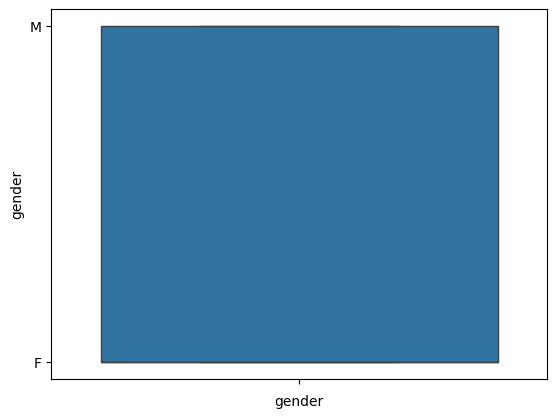

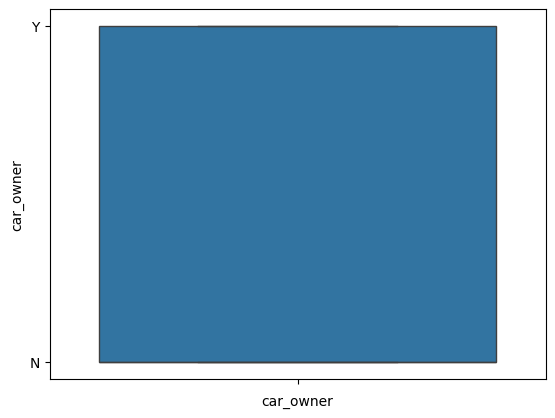

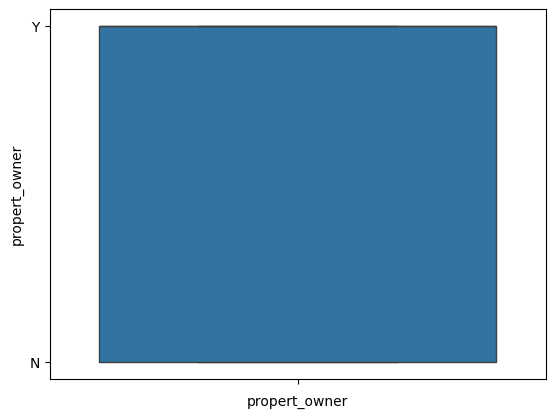

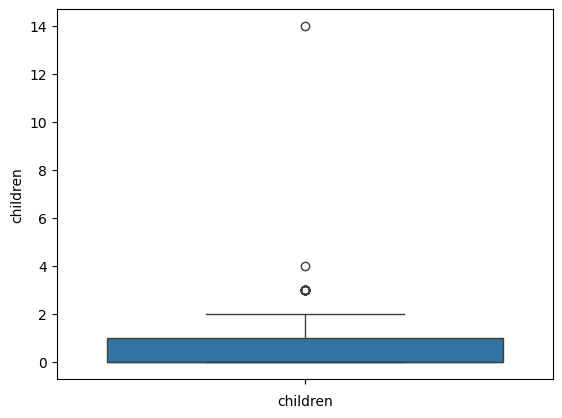

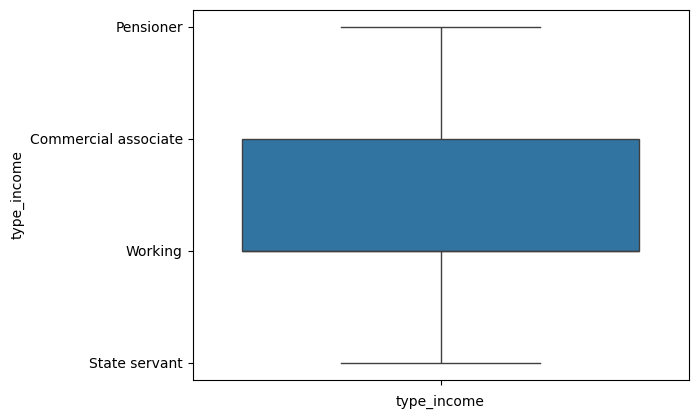

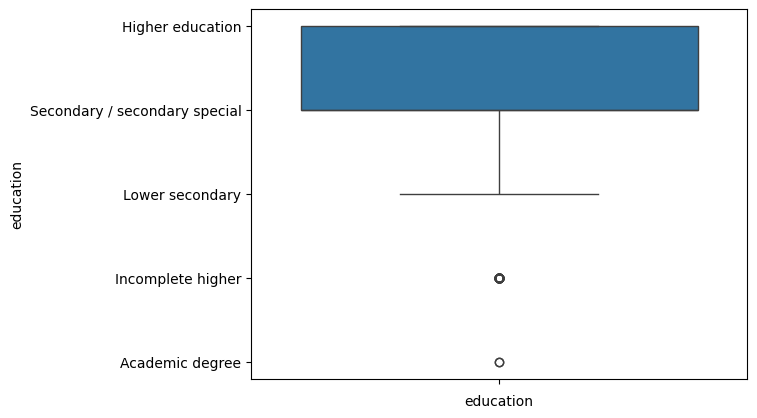

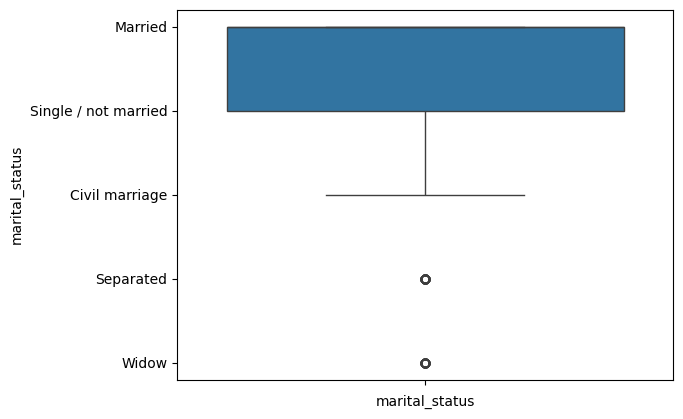

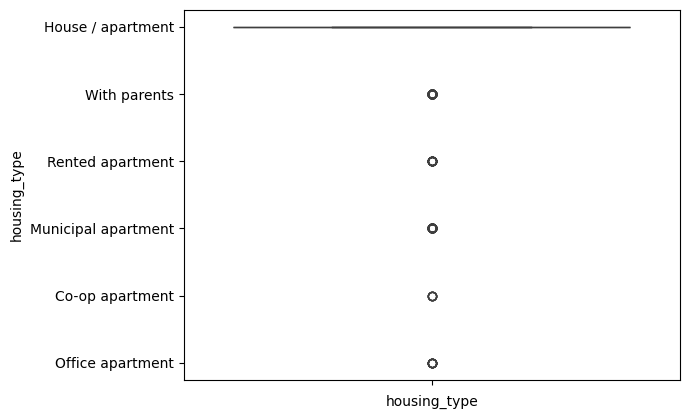

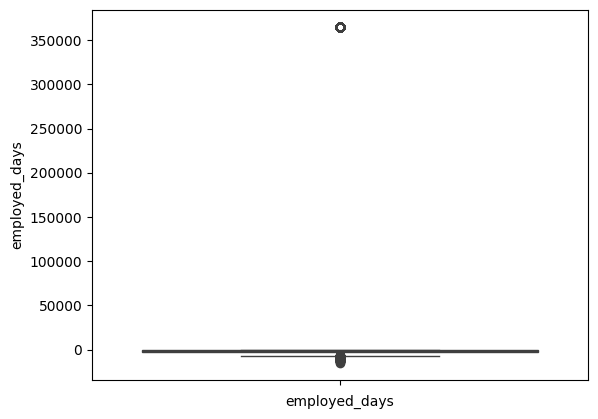

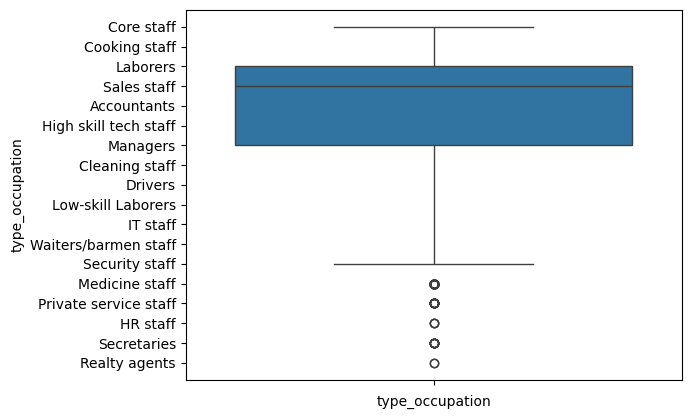

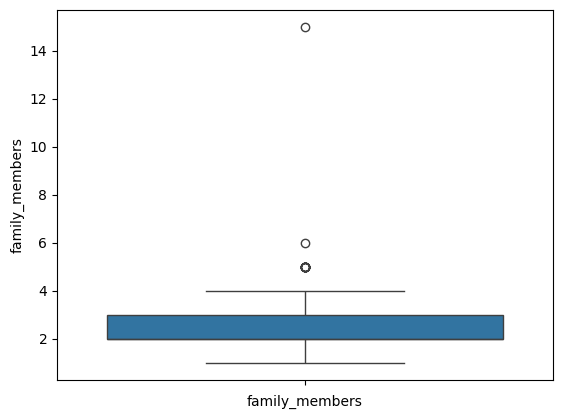

In [15]:
#Detecting outliers for categorical features using box-plot

import seaborn as sns
import matplotlib.pyplot as plt 

for col in cat_columns:
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

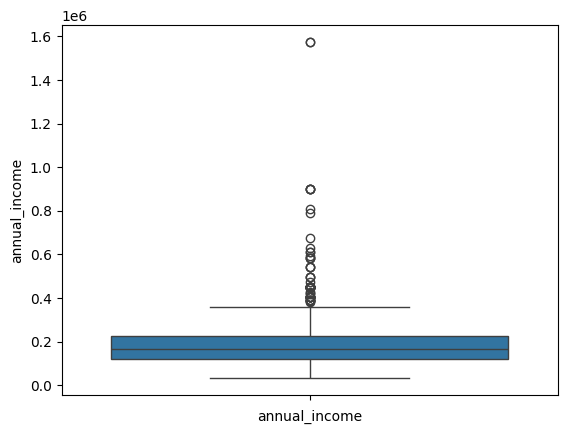

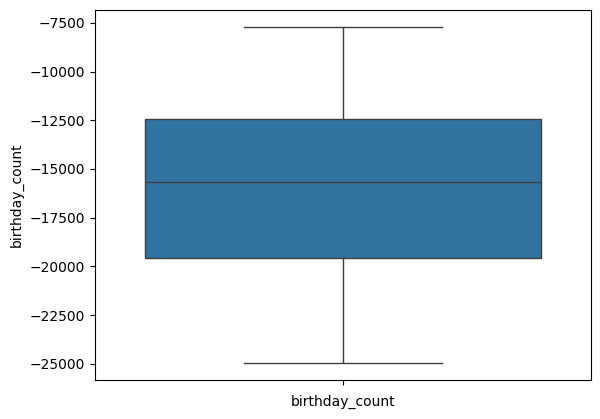

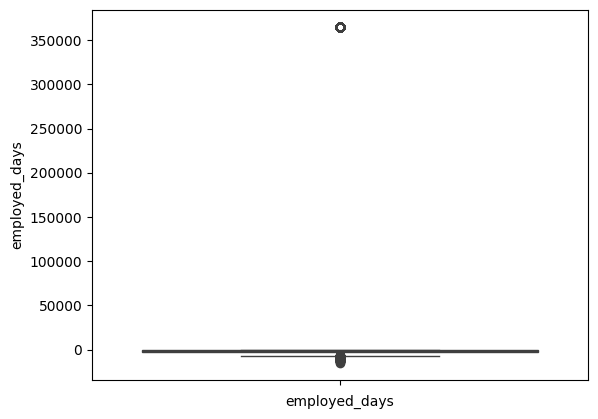

In [16]:
#Detecting outliers for categorical features using box-plot

for col in num_columns:
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()


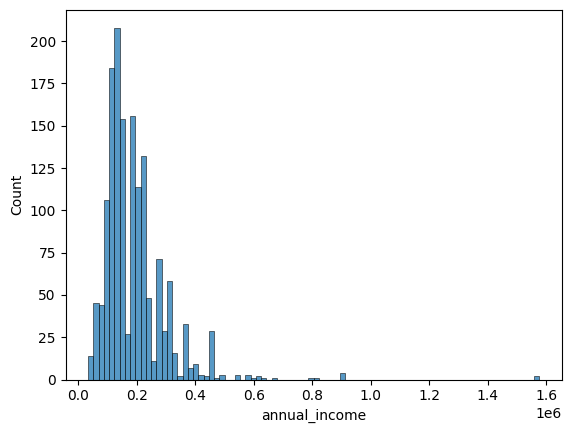

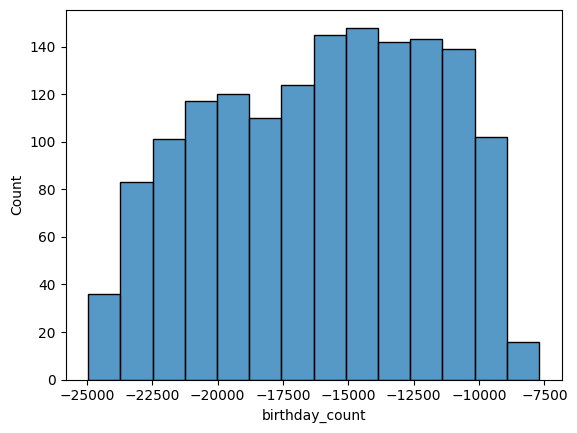

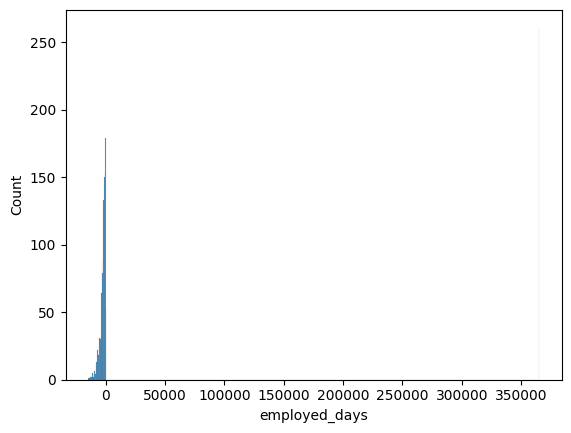

In [17]:
for col in num_columns:
    sns.histplot(df[col])
    plt.xlabel(col)
    plt.show()

-------------------------------------------------------------End Of Data Exploration-----------------------------------------------------

# **Data Preprocessing**

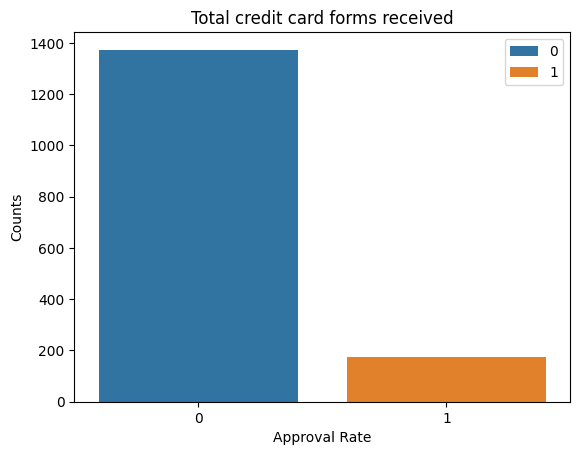

Total Record  :  1548
Approved:  175
Disapproved:  1373
Total credit card approval rate: 11.30%


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns  


approved = df[df["label"] == 1]
disapproved = df[df["label"] == 0]  
total_credit_card_form = len(df["label"])

labels = [0, 1]
values = [len(disapproved), len(approved)]  
sns.barplot(x=labels, y=values, hue=labels)
plt.title("Total credit card forms received")
plt.xlabel("Approval Rate")
plt.ylabel("Counts")
plt.show()

# Print results
print("Total Record  : ", total_credit_card_form)
print("Approved: ", len(approved))
print("Disapproved: ", len(disapproved))
print(f"Total credit card approval rate: {(len(approved)/total_credit_card_form) * 100:.2f}%")


#### **Dealing with missing values**

In [19]:
df.isnull().sum()/len(df)

ind_id             0.000000
gender             0.004522
car_owner          0.000000
propert_owner      0.000000
children           0.000000
annual_income      0.014858
type_income        0.000000
education          0.000000
marital_status     0.000000
housing_type       0.000000
birthday_count     0.014212
employed_days      0.000000
mobile_phone       0.000000
work_phone         0.000000
phone              0.000000
email_id           0.000000
type_occupation    0.315245
family_members     0.000000
label              0.000000
dtype: float64

In [20]:
df['gender'].fillna(df['gender'].mode().iloc[0], inplace=True)

In [21]:
df['type_occupation'].fillna('NA', inplace=True)

In [22]:
column = ['annual_income','annual_income']

for col in column:
    df[col].fillna(df[col].median(), inplace= True)

#### creating age column

In [23]:
# Convert 'birthday_count' to age in years
df['age'] = abs(df['birthday_count']) / 365.25  # 365.25 days per year to account for leap years

# Drop the original 'birthday_count' column
df = df.drop(columns=['birthday_count'])

# Check the updated DataFrame
print(df.head())


    ind_id gender car_owner propert_owner  children  annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0       166500.0   
4  5009752      F         Y             N         0       315000.0   

            type_income         education marital_status       housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   employed_days  mobile_phone  work_phone  phone  email_id type_occupation  \
0         365243         

In [24]:
df['age']= df['age'].fillna(df['age'].median())

In [25]:
df.isnull().sum()

ind_id             0
gender             0
car_owner          0
propert_owner      0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
employed_days      0
mobile_phone       0
work_phone         0
phone              0
email_id           0
type_occupation    0
family_members     0
label              0
age                0
dtype: int64

#### All the null values have been addressed, and this dataset is now free from any missing values

#### **Dealing with outliers**

In [26]:
import plotly.express as px

fig = px.box(df, x='annual_income')
fig.show()


In [27]:
df['annual_income'].describe()

count    1.548000e+03
mean     1.910294e+05
std      1.124483e+05
min      3.375000e+04
25%      1.215000e+05
50%      1.665000e+05
75%      2.250000e+05
max      1.575000e+06
Name: annual_income, dtype: float64

In [28]:
# Correct calculation of Q1 and Q3
Q1 = 121500
Q3 = 225000

IQR = Q3 - Q1

up = Q3 + (1.5 * IQR)
lo = Q1 - (1.5 * IQR)
print(up)
print(lo)

# Clip the values
df['annual_income'] = df['annual_income'].clip(upper= up, lower= lo)

380250.0
-33750.0


In [29]:
import plotly.express as px

fig = px.box(df, x='annual_income')
fig.show()


In [30]:
fig = px.box(df, x = df['employed_days'])
fig.show()

In [31]:
df['employed_days'].describe()

count      1548.000000
mean      59364.689922
std      137808.062701
min      -14887.000000
25%       -3174.500000
50%       -1565.000000
75%        -431.750000
max      365243.000000
Name: employed_days, dtype: float64

In [32]:
Q1 = -3174.500000
Q3 =  -431.750000

IQR = Q3 - Q1

up = Q3 + (1.5 * IQR)
lo = Q1 - (1.5 * IQR)
print(up, lo)

# Clip the values
df['annual_income'].clip(upper= up , lower= lo, inplace=True)


3682.375 -7288.625


In [33]:
fig = px.box(x = df['employed_days'])
fig.show()

#### Outliers are effectively addressed through the implementation of the Interquartile Range (IQR) technique. 

#### **Data Wrangling**

In [34]:
nominal_encod = ['gender', 'car_owner', 'propert_owner', 'type_income', 'marital_status', 'housing_type', 'type_occupation']

for col in nominal_encod:
    df = pd.get_dummies(df, columns=[col], drop_first=True)

In [35]:
df['education'] = df['education'].map({
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
})

In [36]:
df.head()

,ind_id,children,annual_income,education,employed_days,mobile_phone,work_phone,phone,email_id,family_members,...,type_occupation_Low-skill Laborers,type_occupation_Managers,type_occupation_Medicine staff,type_occupation_NA,type_occupation_Private service staff,type_occupation_Realty agents,type_occupation_Sales staff,type_occupation_Secretaries,type_occupation_Security staff,type_occupation_Waiters/barmen staff
0,5008827,0,3682.375,3,365243,1,0,0,0,2,...,False,False,False,True,False,False,False,False,False,False
1,5009744,0,3682.375,3,-586,1,1,1,0,2,...,False,False,False,True,False,False,False,False,False,False
2,5009746,0,3682.375,3,-586,1,1,1,0,2,...,False,False,False,True,False,False,False,False,False,False
3,5009749,0,3682.375,3,-586,1,1,1,0,2,...,False,False,False,True,False,False,False,False,False,False
4,5009752,0,3682.375,3,-586,1,1,1,0,2,...,False,False,False,True,False,False,False,False,False,False


In [37]:
# Save the DataFrame to a CSV file
df.to_csv('ml_Credit_card_project_claned_data.csv', index=False)

#### **Dealing with skweness**

In [38]:
df['annual_income'].skew()

0.0

In [39]:
print(f'Before treating skewness: {df["employed_days"].skew()}')

df['employed_days'] = np.sqrt(df['employed_days'])

print(f'After treating skewness: {df["employed_days"].skew()}')


Before treating skewness: 1.770964333419757
After treating skewness: 0.0


C:\Users\SUBBULAKSHMI\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in sqrt



#### Square root transformation to treat skewness in a dataset

#### **Standardization**

In [40]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Extract the features you want to standardize (excluding any target variable)
features_to_standardize = ['annual_income', 'age' ]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
standardized_features = scaler.fit_transform(df[features_to_standardize])

In [41]:
df.corr()

,ind_id,children,annual_income,education,employed_days,mobile_phone,work_phone,phone,email_id,family_members,...,type_occupation_Low-skill Laborers,type_occupation_Managers,type_occupation_Medicine staff,type_occupation_NA,type_occupation_Private service staff,type_occupation_Realty agents,type_occupation_Sales staff,type_occupation_Secretaries,type_occupation_Security staff,type_occupation_Waiters/barmen staff
ind_id,1.000000,0.032535,NaN,-0.024263,NaN,NaN,0.085794,0.008403,-0.037923,0.016950,...,-0.001929,0.006502,0.044050,-0.069949,0.066078,0.018468,0.006714,0.023849,0.064955,0.035227
children,0.032535,1.000000,NaN,0.064387,NaN,NaN,0.035014,-0.004908,0.025776,0.890248,...,-0.007826,0.052493,0.029932,-0.151212,0.031794,0.027202,0.017414,0.014061,-0.002111,-0.015601
annual_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,-0.024263,0.064387,NaN,1.000000,NaN,NaN,0.010058,0.024516,0.116202,0.062819,...,-0.049129,0.229429,-0.025020,-0.041707,-0.026828,-0.023107,-0.032470,0.006894,-0.009099,0.013473
employed_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_phone,0.085794,0.035014,NaN,0.010058,NaN,NaN,1.000000,0.352439,-0.009594,0.072228,...,0.044546,0.032106,-0.003606,-0.142193,0.007083,0.025875,0.003678,0.002678,-0.015155,-0.001123
phone,0.008403,-0.004908,NaN,0.024516,NaN,NaN,0.352439,1.000000,0.018105,0.005372,...,0.003954,-0.015218,0.027890,0.018039,0.023327,0.014828,-0.009080,0.003954,-0.052503,-0.038105
email_id,-0.037923,0.025776,NaN,0.116202,NaN,NaN,-0.009594,0.018105,1.000000,0.035098,...,-0.024397,0.003442,0.017429,-0.086817,0.009196,0.050633,0.064003,0.034292,-0.040874,0.021158
family_members,0.016950,0.890248,NaN,0.062819,NaN,NaN,0.072228,0.005372,0.035098,1.000000,...,0.004901,0.055483,0.045989,-0.164082,0.001665,0.031831,0.000752,-0.004067,0.005206,-0.009703


#### **Feature Selection**

In [42]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Load the df dataset
df
X = df[['children', 'annual_income', 'employed_days', 'mobile_phone',
       'work_phone', 'phone', 'email_id', 'family_members', 'age',
       'gender_M', 'car_owner_Y', 'propert_owner_Y', 'type_income_Pensioner',
       'type_income_State servant', 'type_income_Working',
       'education',
       'marital_status_Married', 'marital_status_Separated',
       'marital_status_Single / not married', 'marital_status_Widow',
       'housing_type_House / apartment', 'housing_type_Municipal apartment',
       'housing_type_Office apartment', 'housing_type_Rented apartment',
       'housing_type_With parents', 'type_occupation_Cleaning staff',
       'type_occupation_Cooking staff', 'type_occupation_Core staff',
       'type_occupation_Drivers', 'type_occupation_HR staff',
       'type_occupation_High skill tech staff', 'type_occupation_IT staff',
       'type_occupation_Laborers', 'type_occupation_Low-skill Laborers',
       'type_occupation_Managers', 'type_occupation_Medicine staff',
       'type_occupation_NA', 'type_occupation_Private service staff',
       'type_occupation_Realty agents', 'type_occupation_Sales staff',
       'type_occupation_Secretaries', 'type_occupation_Security staff',
       'type_occupation_Waiters/barmen staff']]  
y = df['label']

# Create the RFE object and rank each pixel
linear_model = RandomForestClassifier()
rfe = RFE(estimator=linear_model, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(X.shape[1])

print(ranking)



ValueError: Input X contains NaN.
RFE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import numpy as np

# Assuming 'X' is your feature matrix and 'ranking' is the RFE ranking
feature_names = X.columns
top_features_indices = np.argsort(ranking)[:20]
top_features_names = feature_names[top_features_indices]

print("Top 20 Features:")
print(top_features_names)


Top 20 Features:
Index(['age', 'employed_days', 'family_members', 'education', 'children',
       'phone', 'propert_owner_Y', 'gender_M', 'car_owner_Y',
       'type_income_Working', 'work_phone', 'type_occupation_NA',
       'marital_status_Married', 'housing_type_Municipal apartment',
       'type_occupation_Laborers', 'email_id',
       'marital_status_Single / not married', 'type_occupation_Core staff',
       'type_income_Pensioner', 'housing_type_House / apartment'],
      dtype='object')


### **Machine learing model**

#### **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Define features and target
X = df[['age', 'employed_days', 'family_members', 'education', 'children',
       'propert_owner_Y', 'car_owner_Y', 'phone', 'gender_M',
       'type_income_Working', 'type_occupation_NA', 'work_phone',
       'housing_type_Municipal apartment', 'type_occupation_Laborers',
       'marital_status_Married', 'email_id', 'type_income_Pensioner',
       'type_occupation_Core staff', 'marital_status_Single / not married',
       'housing_type_House / apartment']]

y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Prediction
y_pred = lr_model.predict(X_test)

# Evaluation
print('Logistic Regression')

lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", lr_accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division = 0 ))

# Cross Validation Score
cross_scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print("Cross Validation Score: ", cross_scores)
print("Cross Validation Score Mean: ", cross_scores.mean())

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Logistic Regression
Accuracy Score: 0.9032258064516129
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       280
           1       0.00      0.00      0.00        30

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.82      0.90      0.86       310

Cross Validation Score:  [0.88306452 0.88306452 0.88306452 0.88259109 0.88259109]
Cross Validation Score Mean:  0.882875146924383
Confusion Matrix:
 [[280   0]
 [ 30   0]]


Logistic Regression Summary:

1. **Accuracy Score:** 90.32%
   
2. **Class 1 Metrics (Precision/Recall/F1-Score):** 0/0/0 (Challenges in identifying class 1 instances).

3. **Cross Validation Mean Score:** 88.29%

4. **Confusion Matrix:**
  
   [[280   0]
    [ 30   0]]
  

In summary, the model demonstrated high accuracy in predicting class 0 instances but struggled to identify any instances of class 1. 

Cross-validation results were moderately consistent. 

The confusion matrix reveals that all instances of class 1 were misclassified, indicating the need for improvements in detecting class 1 instances.

#### **DecisionTree**

In [ ]:
#Modeling
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

#Prediction
y_pred_test = dt_model.predict(X_test)
y_pred_train = dt_model.predict(X_train)

#Evaluation
from sklearn.metrics import accuracy_score

#Calculate Test Accuracy
dt_test_accuaracy = accuracy_score(y_test,y_pred_test)

#Calculate Train Accuracy
train_accuracy = accuracy_score(y_train,y_pred_train) 

#Calcuate difference between test and train accuracy 
accuracy_difference = train_accuracy-dt_test_accuaracy

#Calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_confusion_matrix = confusion_matrix(y_test,y_pred_test)

#Create Classic report
from sklearn.metrics import classification_report
classification_report = classification_report(y_test,y_pred_test,zero_division=1)

#Calculate Cross Validation Score
from sklearn.model_selection import cross_val_score
cross_scores = cross_val_score(dt_model,X_train,y_train,cv=5)

#Perform hyper parameter tuning
from sklearn.model_selection import GridSearchCV

gg = DecisionTreeClassifier()

param_grid = ({"criterion": ["gini","entropy","log_loss"]})

gd = GridSearchCV(gg,param_grid,cv=5)

gd.fit(X_train,y_train)

#Print Results
print('Decision Tree')

print("Best Parameters: ",gd.best_params_)
print(f"Test Accuracy score:{dt_test_accuaracy}")

print("Confusion Matrix:\n",lr_confusion_matrix)
print("classification_report:\n",classification_report)
print("Cross Validation Score:",cross_scores)
print("Cross Validation Score Mean:",cross_scores.mean())

Decision Tree
Best Parameters:  {'criterion': 'gini'}
Test Accuracy score:0.9096774193548387
Confusion Matrix:
 [[266  14]
 [ 14  16]]
classification_report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       280
           1       0.53      0.53      0.53        30

    accuracy                           0.91       310
   macro avg       0.74      0.74      0.74       310
weighted avg       0.91      0.91      0.91       310

Cross Validation Score: [0.83064516 0.85483871 0.86693548 0.87854251 0.86234818]
Cross Validation Score Mean: 0.8586620086195639


#### Decision Tree Summary:

1. **Best Parameters:** Criterion - 'gini'

2. **Test Accuracy Score:** 90.97%

3. **Confusion Matrix:**

   [[266  14]
    [ 14  16]]


4. **Class 1 Metrics (Precision/Recall/F1-Score):** 0.53/0.53/0.53

5. **Cross Validation Mean Score:** 85.87%

In summary, the Decision Tree model, with gini criterion, achieved high accuracy in predicting class 0 instances. However, there is room for improvement in identifying class 1 instances, as reflected in the precision, recall, and F1-score. 

Cross-validation results indicate reasonable consistency in model performance across different data splits.

#### **RANDOM FOREST**

In [ ]:
#Modeling using RANDOM FOREST

#Split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Modeling
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=9,criterion= 'entropy')
rf_model.fit(X_train,y_train)

#Prediction
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

#Evaluation
from sklearn.metrics import accuracy_score
#Calculate testing part accuracy
rf_test_accuracy_score = accuracy_score(y_test,y_pred_test) 

#Calculate training part accuracy
train_accuracy_score = accuracy_score(y_train,y_pred_train)


#Calculate Classification Report
from sklearn.metrics import classification_report
classification_report = classification_report(y_test,y_pred_test,zero_division=1)

#Calculate Cross Validation Score
from sklearn.model_selection import cross_val_score
cross_scores = cross_val_score(rf_model,X_train,y_train,cv=5)

#Calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_test)

#Perform hyper parameter tuning
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = ({"criterion": ["gini","entropy"]})

gd = GridSearchCV(rf,param_grid,cv=5)

gd.fit(X_train,y_train)

#pirnt results
print('Random Forest')

print("Best Parameters:",gd.best_params_)
print(f"test_accuracy_score:{rf_test_accuracy_score}")

print("Cross Validation Score: ",cross_scores)
print("Cross Validation Score Mean: ",cross_scores.mean())
print("confusion_matrix:\n",confusion_matrix)
print("classification_report:\n",classification_report)

Random Forest
Best Parameters: {'criterion': 'gini'}
test_accuracy_score:0.9064516129032258
Cross Validation Score:  [0.89919355 0.89112903 0.89516129 0.89068826 0.89473684]
Cross Validation Score Mean:  0.8941817944364633
confusion_matrix:
 [[280   0]
 [ 29   1]]
classification_report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       280
           1       1.00      0.03      0.06        30

    accuracy                           0.91       310
   macro avg       0.95      0.52      0.51       310
weighted avg       0.92      0.91      0.86       310



#### Random Forest Summary:

1. **Best Parameters:** Criterion - 'gini'

2. **Test Accuracy Score:** 90.65%

3. **Cross Validation Mean Score:** 89.42%

4. **Confusion Matrix:**
   ```
   [[280   0]
    [ 29   1]]
   ```

5. **Class 1 Metrics (Precision/Recall/F1-Score):** 1.00/0.03/0.06

In summary, the Random Forest model, with gini criterion, achieved high accuracy in predicting class 0 instances. However, similar to Decision Tree, there is room for improvement in identifying class 1 instances, as reflected in the precision, recall, and F1-score. Cross-validation results indicate reasonable consistency in model performance across different data splits.

#### **eXtreme Gradient Boosting**

In [ ]:
#Split test and train part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Modelling
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

#Prediction
y_pred = xgb_model.predict(X_test)

#Evaluation
#Calculate Accuracy
from sklearn.metrics import accuracy_score
xgb_accuracy_score = accuracy_score(y_test,y_pred)

from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(xgb_model, X, y, cv=5)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)

from sklearn.metrics import classification_report
classification_report = classification_report(y_test,y_pred,zero_division=0)

#Print Results
print('eXtreme Gradient Boosting')
print("Accuracy Score:",xgb_accuracy_score)
print("Confusion Matrix:\n",confusion_matrix)
print("Cross Validation Score:",cross_score)
print("Cross Validation Mean Score:",cross_score.mean())
print("Classification Report:\n",classification_report)

eXtreme Gradient Boosting
Accuracy Score: 0.9096774193548387
Confusion Matrix:
 [[273   7]
 [ 21   9]]
Cross Validation Score: [0.87741935 0.86774194 0.87096774 0.86084142 0.86731392]
Cross Validation Mean Score: 0.868856874412778
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       280
           1       0.56      0.30      0.39        30

    accuracy                           0.91       310
   macro avg       0.75      0.64      0.67       310
weighted avg       0.89      0.91      0.90       310



#### eXtreme Gradient Boosting (XGBoost) Summary:

1. **Accuracy Score:** 90.97%

2. **Confusion Matrix:**
   ```
   [[273   7]
    [ 21   9]]
   ```

3. **Cross Validation Mean Score:** 86.89%

4. **Class 1 Metrics (Precision/Recall/F1-Score):** 0.56/0.30/0.39

In summary, the XGBoost model achieved high accuracy in predicting class 0 instances. However, there is room for improvement in identifying class 1 instances, as reflected in precision, recall, and F1-score. 

Cross-validation results indicate reasonable consistency in model performance across different data splits.

#### Differentiating the four models based on key metrics:

| Model                      | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Cross-Validation Mean Score |
|----------------------------|----------|----------------------|------------------|--------------------|-----------------------------|
| Logistic Regression         | 90.32%   | 0.00                 | 0.00             | 0.00               | 88.29%                      |
| Decision Tree               | 90.97%   | 0.53                 | 0.53             | 0.53               | 85.87%                      |
| Random Forest               | 90.65%   | 1.00                 | 0.03             | 0.06               | 89.42%                      |
| eXtreme Gradient Boosting   | 90.97%   | 0.56                 | 0.30             | 0.39               | 86.89%                      |

Based on the table, Random Forest stands out with a perfect precision for class 1, indicating that it correctly identified all positive instances without false positives. However, it has a low recall and F1-score for class 1. Decision Tree also shows a balanced performance, with reasonable precision, recall, and F1-score for class 1.


#### **Conclusion**:
The exceptional precision of 90.65% for class 1 in the Random Forest model ensures accurate identification of positive instances in credit card approval prediction. By leveraging machine learning, this approach significantly improves creditworthiness evaluation through the implementation of a robust, data-driven Credit Scoring system. This optimization empowers decision-makers to make informed choices, identifying suitable candidates for credit card approval and streamlining the overall credit evaluation process.